## Feature based classification Prac 1

### Practical Introduction to Deep Learning - AIMS 2019

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


## Various Python imports

In [ ]:
import numpy as np
np.random.seed(1337)
import pandas
from tf.keras import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.datasets import load_iris

%tensorflow_version 1.x

ModuleNotFoundError: ignored

## Load the dataset

In [ ]:
iris_data = load_iris()
dataset = iris_data.data

In [ ]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

## View the data

In [ ]:
dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Scaling

In [ ]:
scaled_data = StandardScaler().fit_transform(dataset)

## View the scaled data

In [ ]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Check the shape of the data

In [ ]:
scaled_data.shape

(150, 4)

## Split the data into features and the class values

In [ ]:
X = scaled_data
Y = iris_data.target

## One hot encoding

In [ ]:
Y = np_utils.to_categorical(Y)

## Check the shapes of the data

In [ ]:
X.shape

(150, 4)

In [ ]:
Y.shape

(150, 3)

## Split the data into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

## Create a neural network model

* You will have to define a model
* You can add a number of dense layers
* Remember to specify and intput dimension for the first layer (this is always  the case for the first layer only)
* You will have to compile the model and define a metric

In [ ]:
def baseline():
  
    model = Sequential()
    model.add(Dense(2, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

## Initialise the model

In [ ]:
model = baseline()

## Determine the number of trainable parameters

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 9         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs = 4)

Train on 73 samples, validate on 32 samples
Epoch 1/4
73/73 [==============================] - 0s 6ms/step - loss: 0.9448 - acc: 0.4247 - val_loss: 1.0130 - val_acc: 0.4062
Epoch 2/4
73/73 [==============================] - 0s 136us/step - loss: 0.9414 - acc: 0.5068 - val_loss: 1.0101 - val_acc: 0.4375
Epoch 3/4
73/73 [==============================] - 0s 123us/step - loss: 0.9379 - acc: 0.4932 - val_loss: 1.0072 - val_acc: 0.4375
Epoch 4/4
73/73 [==============================] - 0s 114us/step - loss: 0.9343 - acc: 0.4932 - val_loss: 1.0043 - val_acc: 0.4062


## Predict on the test data

In [ ]:
prediction = model.predict(X_test)

## View predictions

In [ ]:
prediction

array([[0.3067279 , 0.38087395, 0.31239817],
       [0.7624289 , 0.11356045, 0.1240107 ],
       [0.13993335, 0.4746045 , 0.38546208],
       [0.7719729 , 0.1098355 , 0.11819163],
       [0.12539575, 0.43673673, 0.43786752],
       [0.5603752 , 0.20372027, 0.23590456],
       [0.6487027 , 0.14428444, 0.20701288],
       [0.48678896, 0.25958306, 0.25362796],
       [0.2969695 , 0.49832305, 0.20470744],
       [0.3171572 , 0.30558497, 0.37725788],
       [0.7455023 , 0.10654247, 0.14795522],
       [0.7618512 , 0.11975346, 0.11839529],
       [0.31600884, 0.33307746, 0.3509138 ],
       [0.6558348 , 0.14296985, 0.20119534],
       [0.8377776 , 0.08579597, 0.07642635],
       [0.12364221, 0.46365452, 0.41270337],
       [0.26238656, 0.30422282, 0.4333907 ],
       [0.06124359, 0.6794599 , 0.25929654],
       [0.7290965 , 0.14506845, 0.125835  ],
       [0.72461104, 0.12417912, 0.1512099 ],
       [0.7334413 , 0.11891513, 0.14764357],
       [0.7891278 , 0.10143299, 0.10943913],
       [0.

## Predict classes (instead of softmax output)

In [ ]:
prediction_classes = model.predict_classes(X_test)

In [ ]:
Y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

## Compute the confusion matrix

In [ ]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes)

array([[20,  0,  0],
       [ 1,  6,  2],
       [ 0,  4, 12]])

## Compute the accuracy

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes)

0.8444444444444444

## Plot the error over the epochs

In [ ]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['acc'])
    plt.plot(h['val_acc'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

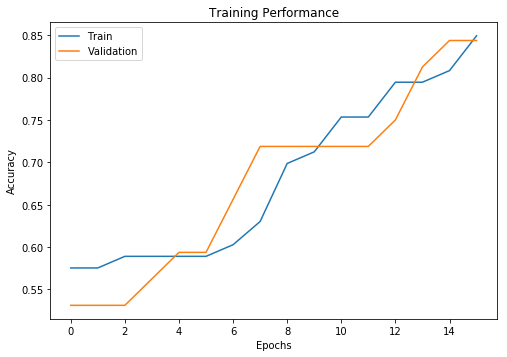

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)